In [ ]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
#read data file
thyroid_data= pd.read_csv("thyroidDF.csv")
print(thyroid_data)#print all data

      age sex on_thyroxine query_on_thyroxine on_antithyroid_meds sick  \
0      29   F            f                  f                   f    f   
1      29   F            f                  f                   f    f   
2      41   F            f                  f                   f    f   
3      36   F            f                  f                   f    f   
4      32   F            f                  f                   f    f   
...   ...  ..          ...                ...                 ...  ...   
9167   56   M            f                  f                   f    f   
9168   22   M            f                  f                   f    f   
9169   69   M            f                  f                   f    f   
9170   47   F            f                  f                   f    f   
9171   31   M            f                  f                   f    f   

     pregnant thyroid_surgery I131_treatment query_hypothyroid  ...    TT4  \
0           f               f    

In [ ]:


#show first and last 10 rows
print("first 10 rows",thyroid_data.head(10))
print("last 10 rows",thyroid_data.tail(10))

first 10 rows    age sex on_thyroxine query_on_thyroxine on_antithyroid_meds sick pregnant  \
0   29   F            f                  f                   f    f        f   
1   29   F            f                  f                   f    f        f   
2   41   F            f                  f                   f    f        f   
3   36   F            f                  f                   f    f        f   
4   32   F            f                  f                   f    f        f   
5   60   F            f                  f                   f    f        f   
6   77   F            f                  f                   f    f        f   
7   28   F            f                  f                   f    f        f   
8   28   F            f                  f                   f    f        f   
9   28   F            f                  f                   f    f        f   

  thyroid_surgery I131_treatment query_hypothyroid  ...    TT4 T4U_measured  \
0               f         

In [ ]:
print("rows: ",thyroid_data.shape[0]) #print number of rows
print("columns: ",thyroid_data.shape[1]) #print number of columns

rows:  9172
columns:  31


In [ ]:
#  Print the name of all the columns.

print("Column names:", thyroid_data.columns.tolist())


Column names: ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source', 'target', 'patient_id']


In [ ]:
print(thyroid_data.columns[-1]) #print last column (patient_id)

patient_id


In [ ]:
#print general info about data_hager

print(thyroid_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

In [ ]:
print( "number of unique values: ",thyroid_data['sick'].nunique())#number of unique values in chosen column
#print the unqiaue values in column,column_name,hager
print("the unique values are: ",thyroid_data['sick'].unique())

number of unique values:  2
the unique values are:  ['f' 't']


In [ ]:
print("most repeated: ",thyroid_data['sick'].mode()) #1-g

most repeated:  0    f
Name: sick, dtype: object


In [ ]:

thyroid_data.describe()#1-h

,age,TSH,T3,TT4,T4U,FTI,TBG,patient_id
count,9172.000000,8330.000000,6568.000000,8730.000000,8363.000000,8370.000000,349.000000,9.172000e+03
mean,73.555822,5.218403,1.970629,108.700305,0.976056,113.640746,29.870057,8.529473e+08
std,1183.976718,24.184006,0.887579,37.522670,0.200360,41.551650,21.080504,7.581969e+06
min,1.000000,0.005000,0.050000,2.000000,0.170000,1.400000,0.100000,8.408010e+08
25%,37.000000,0.460000,1.500000,87.000000,0.860000,93.000000,21.000000,8.504090e+08
50%,55.000000,1.400000,1.900000,104.000000,0.960000,109.000000,26.000000,8.510040e+08
75%,68.000000,2.700000,2.300000,126.000000,1.065000,128.000000,31.000000,8.607110e+08
max,65526.000000,530.000000,18.000000,600.000000,2.330000,881.000000,200.000000,8.701190e+08


In [ ]:
filtered=thyroid_data[thyroid_data['age'] > 30]
print(filtered) #2-a

      age sex on_thyroxine query_on_thyroxine on_antithyroid_meds sick  \
2      41   F            f                  f                   f    f   
3      36   F            f                  f                   f    f   
4      32   F            f                  f                   f    f   
5      60   F            f                  f                   f    f   
6      77   F            f                  f                   f    f   
...   ...  ..          ...                ...                 ...  ...   
9166   70   F            f                  f                   f    f   
9167   56   M            f                  f                   f    f   
9169   69   M            f                  f                   f    f   
9170   47   F            f                  f                   f    f   
9171   31   M            f                  f                   f    f   

     pregnant thyroid_surgery I131_treatment query_hypothyroid  ...    TT4  \
2           f               f    

In [ ]:
#2-b
Tnames = thyroid_data[thyroid_data['FTI_measured'].str.startswith('t')]['FTI_measured'].count()
print(Tnames)

8370


In [ ]:
#2-c
print(thyroid_data.duplicated())
dupsTotal = thyroid_data.duplicated().sum()
print("number",dupsTotal)
thyroid_data.drop_duplicates(inplace=True)#inplace=true to edit the original date itself

print("---------------------------------------------------")


0       False
1       False
2       False
3       False
4       False
        ...  
9167    False
9168    False
9169    False
9170    False
9171    False
Length: 9172, dtype: bool
number 0
---------------------------------------------------


In [ ]:
#2_d
print(thyroid_data['TBG'])
thyroid_data['TBG'] = thyroid_data['TBG'].astype(str)
print(thyroid_data['TBG'])




0        NaN
1        NaN
2       11.0
3       26.0
4       36.0
        ... 
9167     NaN
9168     NaN
9169     NaN
9170     NaN
9171     NaN
Name: TBG, Length: 9172, dtype: float64
0        nan
1        nan
2       11.0
3       26.0
4       36.0
        ... 
9167     nan
9168     nan
9169     nan
9170     nan
9171     nan
Name: TBG, Length: 9172, dtype: object


In [ ]:
#2-e
print(thyroid_data.groupby(['sick','sex']))

In [ ]:
#2-f
thyroid_data.isnull().sum().any()
#there are
#.sum() sums up all the true values and .any()checks if there are any true values

True

In [ ]:
# 2-g
print (thyroid_data)
thyroid_data.fillna(thyroid_data.mode(),inplace=True)#numirical
thyroid_data.fillna(thyroid_data.mode().iloc[0], inplace=True)#categorical
#iloc[o] is to access the first mode in case there were multiples
print("-----------------------------------------")
print(thyroid_data)


      age sex on_thyroxine query_on_thyroxine on_antithyroid_meds sick  \
0      29   F            f                  f                   f    f   
1      29   F            f                  f                   f    f   
2      41   F            f                  f                   f    f   
3      36   F            f                  f                   f    f   
4      32   F            f                  f                   f    f   
...   ...  ..          ...                ...                 ...  ...   
9167   56   M            f                  f                   f    f   
9168   22   M            f                  f                   f    f   
9169   69   M            f                  f                   f    f   
9170   47   F            f                  f                   f    f   
9171   31   M            f                  f                   f    f   

     pregnant thyroid_surgery I131_treatment query_hypothyroid  ...    TT4  \
0           f               f    

In [ ]:
#2-h
bins=pd.cut(thyroid_data["age"], bins=6)
bin_counts = bins.value_counts().sort_index()
print(bins)
print(bin_counts)

0       (-64.525, 10921.833]
1       (-64.525, 10921.833]
2       (-64.525, 10921.833]
3       (-64.525, 10921.833]
4       (-64.525, 10921.833]
                ...         
9167    (-64.525, 10921.833]
9168    (-64.525, 10921.833]
9169    (-64.525, 10921.833]
9170    (-64.525, 10921.833]
9171    (-64.525, 10921.833]
Name: age, Length: 9172, dtype: category
Categories (6, interval[float64, right]): [(-64.525, 10921.833] < (10921.833, 21842.667] <
                                           (21842.667, 32763.5] < (32763.5, 43684.333] <
                                           (43684.333, 54605.167] < (54605.167, 65526.0]]
(-64.525, 10921.833]      9169
(10921.833, 21842.667]       0
(21842.667, 32763.5]         0
(32763.5, 43684.333]         0
(43684.333, 54605.167]       0
(54605.167, 65526.0]         3
Name: age, dtype: int64


In [ ]:
#2-i
max_row = thyroid_data[thyroid_data['age'] == thyroid_data['age'].max()]
print(max_row)

        age sex on_thyroxine query_on_thyroxine on_antithyroid_meds sick  \
8105  65526   F            f                  f                   f    f   

     pregnant thyroid_surgery I131_treatment query_hypothyroid  ...    TT4  \
8105        f               f              f                 f  ...  132.0   

     T4U_measured   T4U FTI_measured    FTI TBG_measured   TBG  \
8105            t  1.02            t  129.0            f  24.0   

      referral_source target  patient_id  
8105            other      -   861014041  

[1 rows x 31 columns]


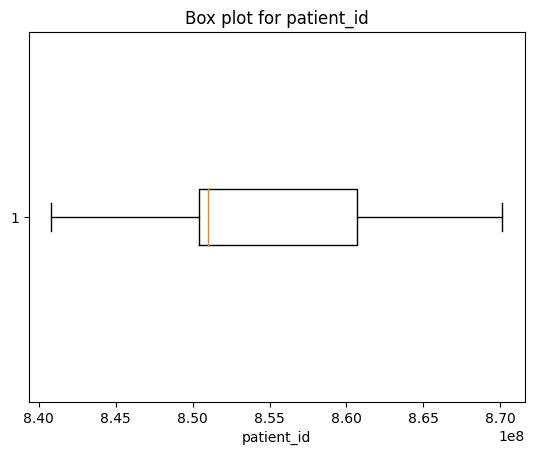

In [ ]:
#2_j
import matplotlib.pyplot as plt
#boxplot for patient_id attribute


plt.boxplot(thyroid_data['patient_id'], vert=False)
plt.title('Box plot for patient_id')
plt.xlabel('patient_id')
plt.show()
#patient id was the only attribut with not so skkewed data

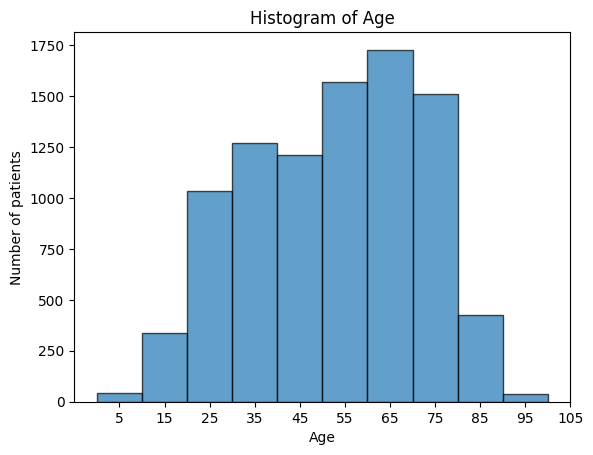

In [ ]:
#2_k

#histogram for age column,with range from 0 to 100
bins = range(0, 110, 10)#each bin holds 10 numbers

plt.hist(thyroid_data["age"], bins=bins, edgecolor='black', alpha=0.7)

plt.xlabel("Age")#x axis is age
plt.ylabel("Number of patients")#y axis is atient number
plt.title("Histogram of Age")#hitsogram title

# Show x-axis labels at the center of each bin
plt.xticks([i + 5 for i in bins])

plt.show()


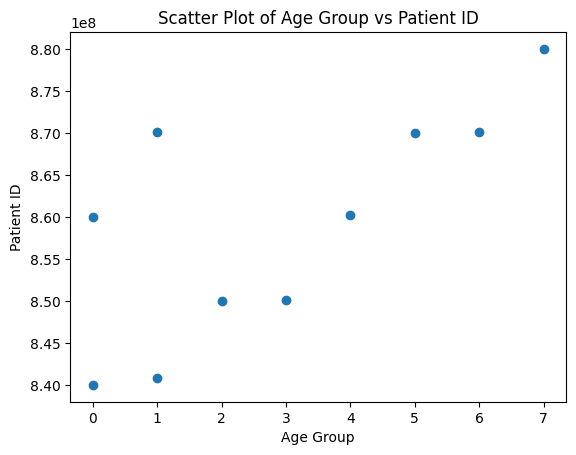

In [ ]:
#2-l
thyroid_data = pd.DataFrame({
    'age': [25, 45, 32, 68, 22, 55, 75, 42, 88, 95],
    'patient_id': [840000000,840801042, 850000000,850110023, 860000000,860210023, 870000000,870119023,870119035, 880000000]
})#the scatterplot represnts relation between age and thyroid  patient
#we have age range and id range as our values

# Define the bins for age
#bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
bins=range(0, 110, 10)


thyroid_data['age_group'] = pd.cut(thyroid_data['age'], bins)#creating x column


thyroid_data['age_group_num'] = pd.factorize(thyroid_data['age_group'])[0]#creating y column

#scattterplot
plt.scatter(thyroid_data['age_group_num'], thyroid_data['patient_id'])

#titles
plt.title('Scatter Plot of Age Group vs Patient ID')
plt.xlabel('Age Group')
plt.ylabel('Patient ID')
plt.show()

In [ ]:
#2-m
#strandilizd means data has man of 0 and deviation of 1
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the numerical features
features = ['age', 'patient_id'] #tbg not ued necause itb was changed to string in a prev part
thyroid_data[features] = scaler.fit_transform(thyroid_data[features])

# Print the standardized data
print(thyroid_data)

        age  patient_id  age_group  age_group_num
0 -1.208066   -1.483547   (20, 30]              0
1 -0.394554   -1.421445   (40, 50]              1
2 -0.923337   -0.708279   (30, 40]              2
3  0.540986   -0.699749   (60, 70]              3
4 -1.330093    0.066990   (20, 30]              0
5  0.012203    0.083272   (50, 60]              4
6  0.825715    0.842258   (70, 80]              5
7 -0.516580    0.851486   (40, 50]              1
8  1.354498    0.851487   (80, 90]              6
9  1.639227    1.617527  (90, 100]              7


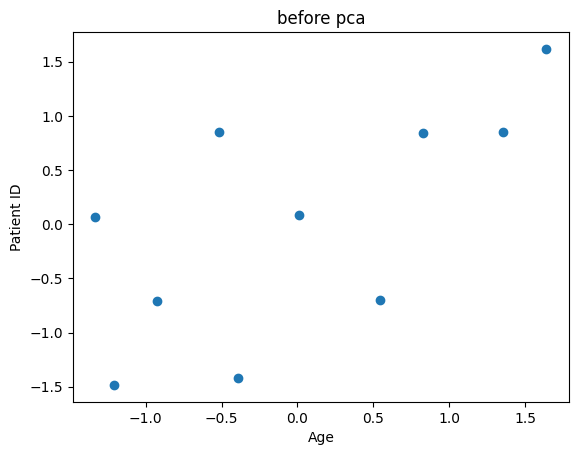

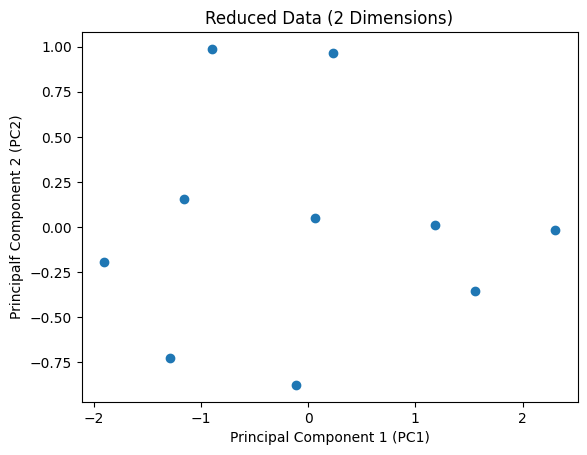

[[-1.90325803 -0.19479484]
 [-1.28410496 -0.72612203]
 [-1.15372629  0.15206881]
 [-0.11226261 -0.87733199]
 [-0.89314865  0.98788658]
 [ 0.06751098  0.05025377]
 [ 1.1794354   0.01169793]
 [ 0.23681399  0.96736896]
 [ 1.55986695 -0.35568269]
 [ 2.30287323 -0.0153445 ]]


In [ ]:
#2_n

#apply pca

pca = PCA(n_components=2)
pca_data = pca.fit_transform(thyroid_data[features])

# Visualize the original data
plt.scatter(thyroid_data["age"], thyroid_data["patient_id"])
plt.title("before pca")
plt.xlabel("Age")
plt.ylabel("Patient ID")
plt.show()

# Visualize the reduced data
plt.scatter(pca_data[:, 0], pca_data[:, 1])
plt.title("Reduced Data (2 Dimensions)")
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principalf Component 2 (PC2)")
plt.show()

# Print the first 10 rows of the PCA data
print(pca_data[:10])